# 代码调试笔记本

In [11]:
#操作目录和文件
import sys, os; 
#导入shp
import shapefile as shpf; 
#处理几何信息
import shapely; 
import shapely.geometry as shplgeo, shapely.affinity as shplaffin; 
import shapely.ops as shplops; 
#投影变换
import pyproj; 

## `shp`文件的导入
导入东湖绿道部分路段路网

In [2]:
import File_IO.ELGW_load

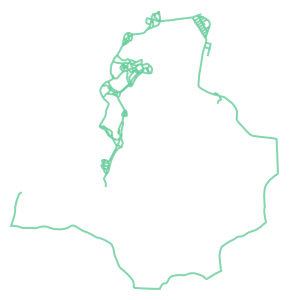

In [4]:
ELGW_Path_Minor_shplgeo, ELGW_Path_Minor_prop = \
    File_IO.ELGW_load.load_path_from_shp(); 
shplgeo.MultiLineString(ELGW_Path_Minor_shplgeo)

In [5]:
shplgeo.MultiLineString(ELGW_Path_Minor_shplgeo).length

35806.340834734954

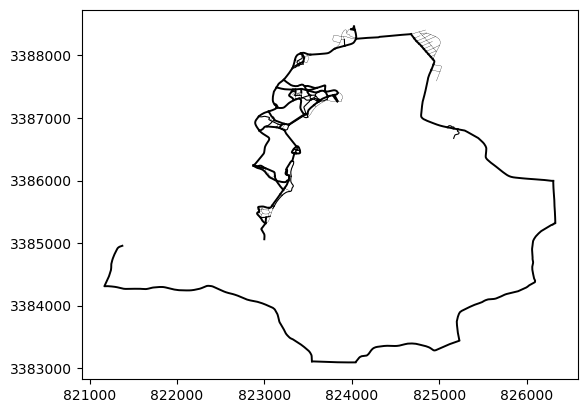

In [6]:
from matplotlib import pyplot as plt; 
for pline, rec in zip(ELGW_Path_Minor_shplgeo, ELGW_Path_Minor_prop): 
    x, y = pline.coords.xy; 
    plt.plot(x, y, color="black", linewidth=2 - 0.6 * rec[2]); 
plt.show(); 

## `shp`文件的投影变换

In [25]:
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [26]:
import Transform.Reproject

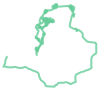

In [29]:
ELGW_Path_Minor_WGS_shplgeo = Transform.Reproject.backward_convert( \
    shplgeo.MultiLineString(ELGW_Path_Minor_shplgeo)); 
ELGW_Path_Minor_WGS_shplgeo